In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

failed

CondaError: KeyboardInterrupt

Libraries imported.


Part I. Use the Notebook to build the code to scrape the following Wikipedia page

In [37]:
df=pd.read_csv("Postal codes Toronto.txt",sep='\t')
df.head()

,Postal Code,Borough,Neighbourhood
0,M2L,North York,"York Mills, Silver Hills"
1,M2P,North York,York Mills West
2,M4C,East York,Woodbine Heights
3,M1G,Scarborough,Woburn
4,M2R,North York,"Willowdale, Willowdale West"


Dataframe processing. Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned

In [ ]:
df1=df[df.Borough!="Not assigned"].reset_index(drop=True)

In [38]:
df1.head()

,Postal Code,Borough,Neighbourhood
0,M2L,North York,"York Mills, Silver Hills"
1,M2P,North York,York Mills West
2,M4C,East York,Woodbine Heights
3,M1G,Scarborough,Woburn
4,M2R,North York,"Willowdale, Willowdale West"


If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.

In [43]:
# check for Neigbourhoods with Not assigned
no_neigh = df1[df1['Neighbourhood'] == 'Not assigned']
print("A total of {} neighborhood(s) is Not assigned".format(len(no_neigh)))


A total of 0 neighborhood(s) is Not assigned


In [44]:
df1.shape

(103, 3)

Part II. Adding geospatial data.

In [49]:
#We will be using a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data
geo_url="http://cocl.us/Geospatial_data"
geo_data=pd.read_csv(geo_url)
geo_data.columns=['Postal Code', 'Latitude', 'Longitude']
df2=pd.merge(df1,geo_data,how='inner',on="Postal Code")

df2.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
1,M2P,North York,York Mills West,43.752758,-79.400049
2,M4C,East York,Woodbine Heights,43.695344,-79.318389
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M2R,North York,"Willowdale, Willowdale West",43.782736,-79.442259


Part III. Exploring and clustering Neighbourhoods in Toronto

In [50]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df2['Borough'].unique()),
        df2.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [51]:
from geopy.geocoders import Nominatim 
import geopy
# convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [52]:
#get Latitute and longitude of toronto

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ON")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of toronto City are 43.6534817, -79.3839347.


In [55]:
# create map of Torronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
map_toronto

In [56]:
# Foursquare
CLIENT_ID = '1EUN32KJAT13TROPGGPPXHRFES2I44RQWF2114QSMXAIMKWE' # my Foursquare ID
CLIENT_SECRET = '4DTPZBHJDLFKSNSICHTIISDY5GV3JLEOGCPXC34WWA0ENMP1' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1EUN32KJAT13TROPGGPPXHRFES2I44RQWF2114QSMXAIMKWE
CLIENT_SECRET:4DTPZBHJDLFKSNSICHTIISDY5GV3JLEOGCPXC34WWA0ENMP1


In [63]:
#URL for top 100 venues in 500m
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    lat, 
    lng, 
    VERSION,
    RADIUS, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=1EUN32KJAT13TROPGGPPXHRFES2I44RQWF2114QSMXAIMKWE&client_secret=4DTPZBHJDLFKSNSICHTIISDY5GV3JLEOGCPXC34WWA0ENMP1&ll=43.7942003,-79.26202940000002&v=20180605&radius=500&limit=100'

In [64]:
# sent GET request and examine result
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff1c7506675562bfbfa396a'},
 'response': {'headerLocation': 'Agincourt',
  'headerFullLocation': 'Agincourt, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.7987003045, 'lng': -79.25580688126533},
   'sw': {'lat': 43.7897002955, 'lng': -79.2682519187347}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e3451fcd4c063434821c41e',
       'name': "Panagio's Breakfast & Lunch",
       'location': {'address': '1928 McCowan Rd.',
        'lat': 43.79237001092506,
        'lng': -79.26020325805978,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.79237001092506,
          'lng': -79.26020325805978}],
        'distance': 251,
        'postalCode': 'M1S 4K

In [70]:
# Write a function to explore neighbourhoods in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
toronto_venues = getNearbyVenues(df2.Neighbourhood, df2.Latitude, df2.Longitude)

York Mills, Silver Hills
York Mills West
Woodbine Heights
Woburn
Willowdale, Willowdale West
Willowdale, Willowdale East
Willowdale, Newtonbrook
Wexford, Maryvale
Weston
Westmount
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Victoria Village
Upper Rouge
University of Toronto, Harbord
Toronto Dominion Centre, Design Exchange
Thorncliffe Park
The Kingsway, Montgomery Road, Old Mill North
The Danforth West, Riverdale
The Beaches
The Annex, North Midtown, Yorkville
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Studio District
Stn A PO Boxes
Steeles West, L'Amoreaux West
St. James Town, Cabbagetown
St. James Town
South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens
Scarborough Village
Runnymede, The Junction North
Runnymede, Swansea
Rouge Hill, Port Union, Highland Creek
Roselawn
Rosedale
Richmond, Adelaide, King
Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Parkwoo

In [71]:
#Now run the above function on each neighbourhood and create a new dataframe called toronto_venues.
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15,15,15,15,15


In [72]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 270 uniques categories.


In [73]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,York Mills West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [74]:
#examine the new dataframe size
toronto_onehot.shape

(2125, 271)

In [75]:
# Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000

In [76]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Breakfast Spot   0.2
1                     Lounge   0.2
2               Skating Rink   0.2
3  Latin American Restaurant   0.2
4             Clothing Store   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1  Sandwich Place  0.12
2     Coffee Shop  0.12
3             Pub  0.12
4    Dance Studio  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                venue  freq
0                Bank  0.10
1         Coffee Shop  0.10
2               Diner  0.05
3  Chinese Restaurant  0.05
4         Gas Station  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Bank  0.25
2   Chinese Restaurant  0.25
3                 Café  0.25
4        Movie Theater  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.08
1      Sandwich Place  0.08
2         Coffee Shop  0.08
3   Indian Re

In [77]:
# Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
# create new dataframe and display top 10 venues for each neighbourhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Gym,Dance Studio,Pharmacy,Coffee Shop,Sandwich Place,Pub,Distribution Center,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Chinese Restaurant,Bridal Shop,Sandwich Place,Diner,Restaurant,Middle Eastern Restaurant,Supermarket,Deli / Bodega
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Thai Restaurant,Pharmacy,Pizza Place,Pub,Café,Butcher,Restaurant


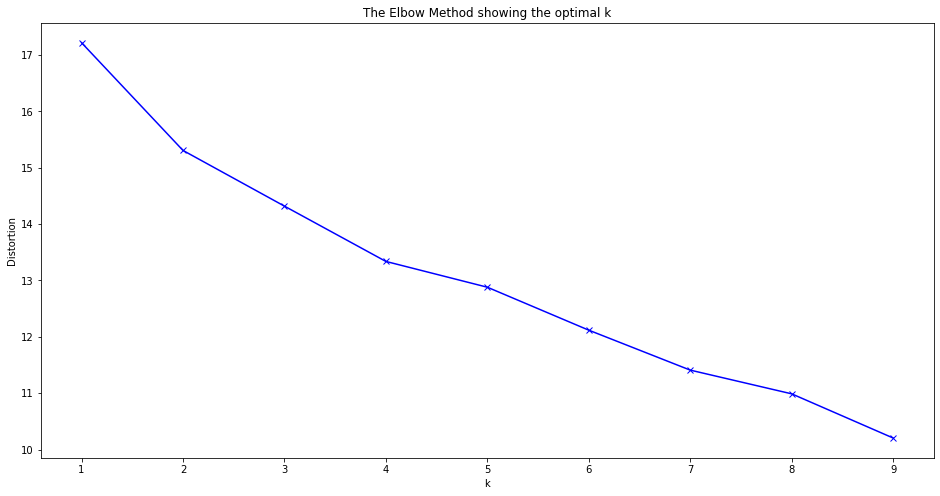

In [79]:
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

import matplotlib.pyplot as plt
# run K-means with a range of k (elbow method)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

# plot the distortions of K
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the 'elbow' is the number 5 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 5.

In [85]:
# define k
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 3, 4, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2,
       3, 1, 3, 3, 3, 3, 1], dtype=int32)

In [89]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df2

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighbourhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), how='right', on='Neighbourhood')


toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,M1S,Scarborough,Agincourt,43.794200,-79.262029,3,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
101,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,3,Pizza Place,Gym,Dance Studio,Pharmacy,Coffee Shop,Sandwich Place,Pub,Distribution Center,Dim Sum Restaurant,Diner
100,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,3,Coffee Shop,Bank,Chinese Restaurant,Bridal Shop,Sandwich Place,Diner,Restaurant,Middle Eastern Restaurant,Supermarket,Deli / Bodega
99,M2K,North York,Bayview Village,43.786947,-79.385975,3,Café,Bank,Chinese Restaurant,Japanese Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
98,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,3,Coffee Shop,Sandwich Place,Italian Restaurant,Thai Restaurant,Pharmacy,Pizza Place,Pub,Café,Butcher,Restaurant


In [90]:
toronto_merged['Cluster Labels'].value_counts()

3    84
1    12
4     1
2     1
0     1
Name: Cluster Labels, dtype: int64

In [91]:
# create map
map_clusters = folium.Map(location=[lat, lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

 Cluster 1

In [92]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Etobicoke,0,River,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio,Dessert Shop


Cluster 2

In [93]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,York,1,Park,Pool,Women's Store,Grocery Store,Falafel Restaurant,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Drugstore
72,East York,1,Park,Convenience Store,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Electronics Store
68,Central Toronto,1,Trail,Park,Sushi Restaurant,Jewelry Store,Yoga Studio,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
58,York,1,Field,Hockey Arena,Trail,Park,Gourmet Shop,Golf Course,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store
53,Etobicoke,1,Park,Pizza Place,Sandwich Place,Bus Line,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
51,Central Toronto,1,Park,Business Service,Swim School,Bus Line,Donut Shop,Distribution Center,Dog Run,Doner Restaurant,Drugstore,Diner
47,Scarborough,1,Park,Intersection,Playground,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
43,North York,1,Park,Basketball Court,Bakery,Construction & Landscaping,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
36,North York,1,Park,Pool,Food & Drink Shop,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Event Space,Dessert Shop,Drugstore
32,Downtown Toronto,1,Park,Trail,Playground,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


Cluster 3

In [94]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,York,2,Jewelry Store,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Field


Cluster 4

In [95]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,Scarborough,3,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
101,Etobicoke,3,Pizza Place,Gym,Dance Studio,Pharmacy,Coffee Shop,Sandwich Place,Pub,Distribution Center,Dim Sum Restaurant,Diner
100,North York,3,Coffee Shop,Bank,Chinese Restaurant,Bridal Shop,Sandwich Place,Diner,Restaurant,Middle Eastern Restaurant,Supermarket,Deli / Bodega
99,North York,3,Café,Bank,Chinese Restaurant,Japanese Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Yoga Studio
98,North York,3,Coffee Shop,Sandwich Place,Italian Restaurant,Thai Restaurant,Pharmacy,Pizza Place,Pub,Café,Butcher,Restaurant
97,Downtown Toronto,3,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Restaurant,Seafood Restaurant,Beer Bar,Farmers Market,Vegetarian / Vegan Restaurant,Basketball Stadium
96,Scarborough,3,College Stadium,Skating Rink,General Entertainment,Café,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
95,West Toronto,3,Café,Coffee Shop,Breakfast Spot,Bakery,Yoga Studio,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store
94,East Toronto,3,Gym / Fitness Center,Spa,Butcher,Skate Park,Burrito Place,Garden,Garden Center,Fast Food Restaurant,Restaurant,Light Rail Station
85,Downtown Toronto,3,Airport Service,Airport Terminal,Airport Lounge,Boat or Ferry,Rental Car Location,Sculpture Garden,Harbor / Marina,Boutique,Airport Gate,Airport Food Court


Cluster 5

In [96]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Scarborough,4,Fast Food Restaurant,Print Shop,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore,Dessert Shop


Observations: most of the neighbourhoods fall in Cluster 4, which has coffee shops, caffee and restaurants.